In [21]:
import pandas as pd
import numpy as np

In [22]:
df=pd.read_csv('data.csv')

In [23]:
df.drop('no.',axis=1,inplace=True)

In [24]:
df

,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,EDA_phasic_mean,EDA_phasic_std,EDA_phasic_min,EDA_phasic_max,EDA_smna_mean,EDA_smna_std,...,age,height,weight,gender_ female,gender_ male,coffee_today_YES,sport_today_YES,smoker_NO,smoker_YES,feel_ill_today_YES
0,1.397968,0.141481,1.109299,1.678399,1.824289,1.088328,0.367977,4.319987,1.284376,1.952823,...,27,175,80,0,1,0,0,1,0,0
1,1.210132,0.091882,1.014138,1.485800,2.109146,1.223528,0.539150,4.459367,1.467865,2.852510,...,27,175,80,0,1,0,0,1,0,0
2,1.010977,0.102315,0.832216,1.190967,0.152828,0.128896,0.006950,0.544346,0.105091,0.244891,...,27,175,80,0,1,0,0,1,0,0
3,0.775187,0.046391,0.693996,0.876819,0.177595,0.126167,0.002789,0.361388,0.110786,0.199704,...,27,175,80,0,1,0,0,1,0,0
4,0.657494,0.034540,0.594667,0.718106,0.035014,0.039616,0.001144,0.132781,0.026716,0.114738,...,27,175,80,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,1.006155,0.002900,0.996533,1.013824,0.005391,0.004034,0.000659,0.014062,0.004986,0.016789,...,29,165,55,1,0,0,0,1,0,0
1174,1.004317,0.003385,0.997601,1.011113,0.010002,0.006730,0.000590,0.028034,0.006968,0.027377,...,29,165,55,1,0,0,0,1,0,0
1175,1.008017,0.002082,1.000110,1.011533,0.008592,0.006620,0.000192,0.023813,0.006563,0.022838,...,29,165,55,1,0,0,0,1,0,0
1176,1.005821,0.001771,1.000503,1.010117,0.004904,0.003361,0.000789,0.013490,0.004013,0.016423,...,29,165,55,1,0,0,0,1,0,0


In [25]:
df.columns

Index(['net_acc_mean', 'net_acc_std', 'net_acc_min', 'net_acc_max',
       'EDA_phasic_mean', 'EDA_phasic_std', 'EDA_phasic_min', 'EDA_phasic_max',
       'EDA_smna_mean', 'EDA_smna_std', 'EDA_smna_min', 'EDA_smna_max',
       'EDA_tonic_mean', 'EDA_tonic_std', 'EDA_tonic_min', 'EDA_tonic_max',
       'BVP_mean', 'BVP_std', 'BVP_min', 'BVP_max', 'TEMP_mean', 'TEMP_std',
       'TEMP_min', 'TEMP_max', 'ACC_x_mean', 'ACC_x_std', 'ACC_x_min',
       'ACC_x_max', 'ACC_y_mean', 'ACC_y_std', 'ACC_y_min', 'ACC_y_max',
       'ACC_z_mean', 'ACC_z_std', 'ACC_z_min', 'ACC_z_max', 'Resp_mean',
       'Resp_std', 'Resp_min', 'Resp_max', 'BVP_peak_freq', 'TEMP_slope',
       'subject', 'label', 'age', 'height', 'weight', 'gender_ female',
       'gender_ male', 'coffee_today_YES', 'sport_today_YES', 'smoker_NO',
       'smoker_YES', 'feel_ill_today_YES'],
      dtype='object')

In [26]:
np.unique(df['label'])

array([0, 1, 2], dtype=int64)

In [27]:
labels = {
    0: "Amused",
    1: "Neutral",
    2: "Stressed"
}

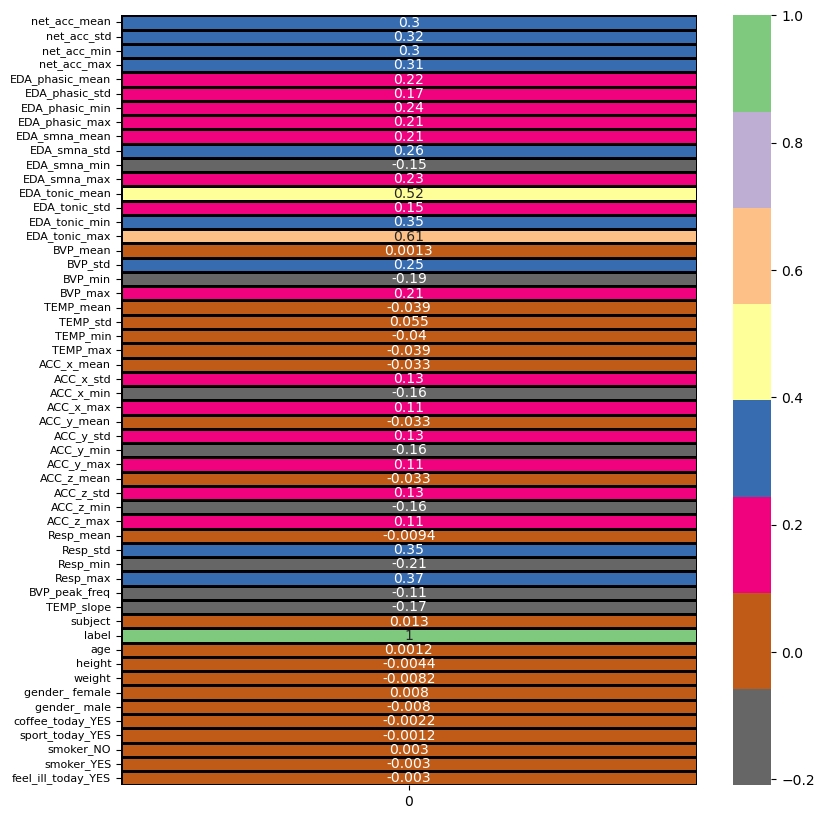

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a wider figure size (e.g., 12 units wide and 10 units tall)
plt.figure(figsize=(12, 10))

# Calculate the correlation matrix
cor = df.corr()

# Extract the correlation values and features
n_targets = len(df.columns)
cor_target = cor['label'].values.reshape(n_targets, 1)
cor_features = cor['label'].keys()

# Create the heatmap with black border lines for each feature
ax = sns.heatmap(cor_target, annot=True, cmap=plt.cm.Accent_r,
                 linecolor='black', linewidths=1)  # Set linecolor to black

# Rotate the y-axis labels for better readability
ax.set_yticklabels(cor_features, rotation=0, fontsize=8)

# Adjust the spacing between y-axis labels
plt.subplots_adjust(left=0.3)

# Save the figure to a file (e.g., 'correlation_heatmap.png')
plt.savefig('correlation_heatmap.png')

# Show the plot
plt.show()


In [29]:

selected_feats =   [
    'BVP_mean', 'BVP_std', 'EDA_phasic_mean', 'EDA_phasic_min', 'EDA_smna_min', 
    'EDA_tonic_mean', 'Resp_mean', 'Resp_std', 'TEMP_mean', 'TEMP_std', 'TEMP_slope',
    'BVP_peak_freq', 'age', 'height', 'weight'
    ]

X = df[selected_feats]
y = df['label']

X.shape, y.shape

((1178, 15), (1178,))

In [30]:
X.head()

,BVP_mean,BVP_std,EDA_phasic_mean,EDA_phasic_min,EDA_smna_min,EDA_tonic_mean,Resp_mean,Resp_std,TEMP_mean,TEMP_std,TEMP_slope,BVP_peak_freq,age,height,weight
0,-0.181673,107.648359,1.824289,0.367977,5.230000e-08,1.232164,0.148184,2.935617,35.817091,0.012674,-0.000169,0.135670,27,175,80
1,-0.830147,118.742089,2.109146,0.539150,3.100000e-08,0.377615,0.037545,2.843123,35.797568,0.029901,-0.000789,0.095023,27,175,80
2,0.939683,42.190039,0.152828,0.006950,4.730000e-08,1.727696,-0.021862,1.700333,35.712909,0.027612,-0.000717,0.076880,27,175,80
3,0.107404,41.606872,0.177595,0.002789,2.790000e-08,0.987927,0.097563,1.483260,35.700811,0.019504,0.000075,0.140271,27,175,80
4,-0.073620,43.121633,0.035014,0.001144,5.170000e-08,0.772262,0.062545,1.501585,35.744727,0.019386,0.000442,0.149321,27,175,80


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [32]:
X_train, X_test = train_test_split(X, test_size=0.1, random_state=0)
y_train, y_test = train_test_split(y, test_size=0.1, random_state=0)

X_train.shape, X_test.shape

((1060, 15), (118, 15))

In [38]:
!pip install tensorflow
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)

# Decision Tree with minimum samples for splitting set to 5
dt = DecisionTreeClassifier(min_samples_split=5)
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)


# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_predictions = lda.predict(X_test)
lda_accuracy = accuracy_score(y_test, lda_predictions)
print("Linear Discriminant Analysis Accuracy:", lda_accuracy)


# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

K-Nearest Neighbors Accuracy: 0.6101694915254238
Decision Tree Accuracy: 0.923728813559322
Linear Discriminant Analysis Accuracy: 0.7711864406779662
SVM Accuracy: 0.5084745762711864


In [40]:
from sklearn.metrics import precision_recall_fscore_support

# K-Nearest Neighbors
knn_precision, knn_recall, knn_f1, _ = precision_recall_fscore_support(y_test, knn_predictions, average='weighted')
print("K-Nearest Neighbors Precision:", knn_precision)
print("K-Nearest Neighbors Recall:", knn_recall)
print("K-Nearest Neighbors F1 Score:", knn_f1)

# Decision Tree
dt_precision, dt_recall, dt_f1, _ = precision_recall_fscore_support(y_test, dt_predictions, average='weighted')
print("Decision Tree Precision:", dt_precision)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree F1 Score:", dt_f1)

# Linear Discriminant Analysis
lda_precision, lda_recall, lda_f1, _ = precision_recall_fscore_support(y_test, lda_predictions, average='weighted')
print("Linear Discriminant Analysis Precision:", lda_precision)
print("Linear Discriminant Analysis Recall:", lda_recall)
print("Linear Discriminant Analysis F1 Score:", lda_f1)

# Support Vector Machine (SVM)
svm_precision, svm_recall, svm_f1, _ = precision_recall_fscore_support(y_test, svm_predictions, average='weighted')
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1 Score:", svm_f1)



K-Nearest Neighbors Precision: 0.5870547776958978
K-Nearest Neighbors Recall: 0.6101694915254238
K-Nearest Neighbors F1 Score: 0.587526691954787
Decision Tree Precision: 0.9232926221335991
Decision Tree Recall: 0.923728813559322
Decision Tree F1 Score: 0.9220294321252317
Linear Discriminant Analysis Precision: 0.7677133777239709
Linear Discriminant Analysis Recall: 0.7711864406779662
Linear Discriminant Analysis F1 Score: 0.7675111127172852
SVM Precision: 0.2854594112399643
SVM Recall: 0.5084745762711864
SVM F1 Score: 0.3656446391163588


C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
def accuracy(predicted, actual):
    n = 0
    for p, a in zip(predicted, actual):
        if p == a:
            n += 1
    return n/len(predicted) * 100

In [36]:
def predict(arr):
    arr = np.array(arr)

    global model
    result = model.predict(arr.reshape(1,-1)).flatten()
    # _prob = model.predict_proba(arr.reshape(1,-1)).flatten()
    return result

In [37]:
predicted = []
for data in X_test.values:
    predicted.append(predict(data))
predicted

accuracy(predicted, y_test.values)

C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hp3007TX\anaconda3\lib\site-packages

C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hp3007TX\anaconda3\lib\site-packages

C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hp3007TX\anaconda3\lib\site-packages

94.91525423728814

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rf_accuracy = accuracy_score(y_test, predicted)
print("Random Forest Accuracy:", rf_accuracy)

rf_precision = precision_score(y_test, predicted, average='weighted')
print("Random Forest Precision:", rf_precision)

rf_recall = recall_score(y_test, predicted, average='weighted')
print("Random Forest Recall:", rf_recall)

rf_f1 = f1_score(y_test, predicted, average='weighted')
print("Random Forest F1 Score:", rf_f1)


Random Forest Accuracy: 0.9491525423728814
Random Forest Precision: 0.9522230410218621
Random Forest Recall: 0.9491525423728814
Random Forest F1 Score: 0.946738958335747


In [43]:
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_split=5), n_estimators=50)
adaboost.fit(X_train, y_train)
adaboost_predictions = adaboost.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
print("AdaBoost Accuracy:", adaboost_accuracy)
adaboost_precision = precision_score(y_test, adaboost_predictions, average='weighted')
print("AdaBoost Precision:", adaboost_precision)

# Calculate Recall
adaboost_recall = recall_score(y_test, adaboost_predictions, average='weighted')
print("AdaBoost Recall:", adaboost_recall)

# Calculate F1 Score
adaboost_f1 = f1_score(y_test, adaboost_predictions, average='weighted')
print("AdaBoost F1 Score:", adaboost_f1)

C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Accuracy: 0.9322033898305084
AdaBoost Precision: 0.9378027888166487
AdaBoost Recall: 0.9322033898305084
AdaBoost F1 Score: 0.9287901894156501


In [ ]:
import pickle

filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [20]:
load_model=pickle.load(open(filename,"rb"))

In [23]:
load_model.predict([[0.107404,41.606872,0.177595,0.002789,2.790000e-08,0.987927,0.097563,1.483260,35.700811,0.019504,0.000075,0.140271,27,175,80]])

C:\Users\Hp3007TX\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)